# 1 Getting data from wiki and trim the data

In [1]:
import requests as req

url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
result = req.get(url)
html_doc = result.content

# html_doc

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"Xsl70QpAEJkAANCrR4QAAABI","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":958430791,"wgRevisionId":958430791,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toronto","Ontario

In [3]:
# import wikipedia as wp
# #Get the html source
# html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")
# df = pd.read_html(html)[0]

In [13]:
# soup.table

In [5]:
import pandas as pd
df = pd.read_html(str(soup.table))[0]
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [6]:
#Delete rows where Borough is 'Not assigned'
df = df[df.Borough!= "Not assigned"]

In [7]:
df_trim = df.groupby(['Postal Code', 'Borough'])['Neighborhood'].apply(list).to_frame().reset_index()


#if Neighbourhood is not assigned, replace by borough name
for index, row in df.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighborhood'] = row['Borough']
        
df_trim.head()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"[Malvern, Rouge]"
1,M1C,Scarborough,"[Rouge Hill, Port Union, Highland Creek]"
2,M1E,Scarborough,"[Guildwood, Morningside, West Hill]"
3,M1G,Scarborough,[Woburn]
4,M1H,Scarborough,[Cedarbrae]


# 2 Getting the location via API

In [8]:
!pip install geocoder

     |████████████████████████████████| 102kB 17.5MB/s ta 0:00:01


In [9]:
import pandas as pd

url="https://cocl.us/Geospatial_data"
# s=requests.get(url).content
c = pd.read_csv(url)

dfc = df.join(c.set_index('Postal Code'), on='Postal Code')
dfc.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M3A,North York,Parkwoods,43.753259,-79.329656
3,M4A,North York,Victoria Village,43.725882,-79.315572
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


# 3. Map

In [10]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [11]:
!pip install folium

     |████████████████████████████████| 102kB 23.8MB/s ta 0:00:01


In [12]:
import folium # map rendering library
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(dfc['Latitude'], dfc['Longitude'], dfc['Borough'], dfc['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

# Capstone

# Background

In [36]:
import requests
import io
import pandas as pd

url="http://www.chp.gov.hk/files/misc/latest_situation_of_reported_cases_covid_19_eng.csv"
response = requests.get(url)

file_object = io.StringIO(response.content.decode('utf-8'))
df_latest_situation_of_reported_cases_covid_19 = pd.read_csv(file_object)
df_latest_situation_of_reported_cases_covid_19.tail()

,As of date,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition
139,26/05/2020,12:00,1065,NaN,NaN,NaN,4,1033,1,1.0
140,27/05/2020,12:00,1066,NaN,NaN,NaN,4,1034,1,1.0
141,28/05/2020,12:00,1066,NaN,NaN,NaN,4,1035,1,1.0
142,29/05/2020,12:00,1079,NaN,NaN,NaN,4,1035,1,1.0
143,30/05/2020,12:00,1082,NaN,NaN,NaN,4,1036,1,1.0


In [35]:
url="http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv"
response = requests.get(url)

file_object = io.StringIO(response.content.decode('utf-8'))
df_cases_covid19_hk = pd.read_csv(file_object)
df_cases_covid19_hk.tail()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
1078,1079,29/05/2020,Asymptomatic,M,29,Prince of Wales Hospital,Hospitalised,HK resident,Imported case,Confirmed
1079,1080,29/05/2020,Asymptomatic,M,21,Tuen Mun Hospital,Hospitalised,HK resident,Imported case,Confirmed
1080,1081,30/05/2020,Asymptomatic,M,38,Princess Margaret Hospital,Hospitalised,HK resident,Imported case,Confirmed
1081,1082,30/05/2020,Asymptomatic,M,8,Princess Margaret Hospital,Hospitalised,HK resident,Imported case,Confirmed
1082,1083,30/05/2020,Asymptomatic,M,1,United Christian Hospital,Hospitalised,HK resident,Imported case,Confirmed


# Analysis

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

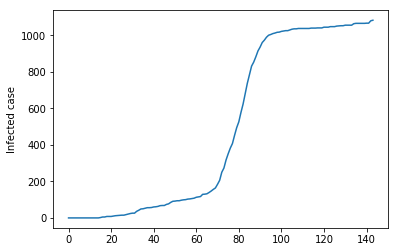

In [32]:
plt.plot(df_latest_situation_of_reported_cases_covid_19['Number of confirmed cases'])
plt.ylabel('Infected case')
plt.show()

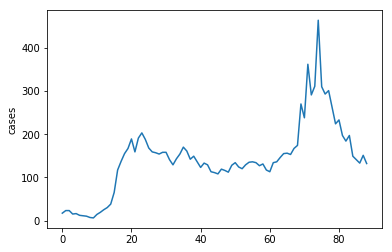

In [33]:
plt.plot(df_latest_situation_of_reported_cases_covid_19['Number of cases still hospitalised for investigation'])
plt.ylabel('cases')
plt.show()

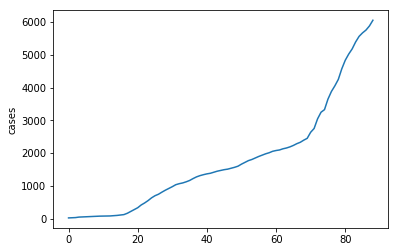

In [34]:
plt.plot(df_latest_situation_of_reported_cases_covid_19['Number of ruled out cases'])
plt.ylabel('cases')
plt.show()


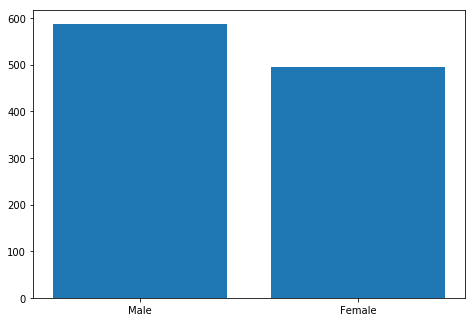

In [65]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Sex = ['Male', 'Female']
count = [df_cases_covid19_hk[df_cases_covid19_hk["Gender"] == "M"]["Gender"].count(),df_cases_covid19_hk[df_cases_covid19_hk["Gender"] == "F"]["Gender"].count()]
ax.bar(Sex,count)
plt.show()
# df_cases_covid19_hk[df_cases_covid19_hk["Gender"] == "M"].head()    # selecting all Male out
# df_cases_covid19_hk[df_cases_covid19_hk["Gender"] == "M"]["Gender"].count()

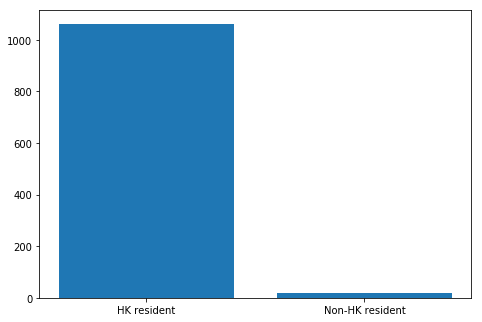

In [104]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# Sex = ['Male', 'Female']
# count = [df_cases_covid19_hk[df_cases_covid19_hk["Gender"] == "M"]["Gender"].count(),df_cases_covid19_hk[df_cases_covid19_hk["Gender"] == "F"]["Gender"].count()]
# ax.bar(Sex,count)
# plt.show()
# df_cases_covid19_hk[df_cases_covid19_hk["Gender"] == "M"].head()    # selecting all Male out
df_Resident = df_cases_covid19_hk["HK/Non-HK resident"].value_counts().to_frame().transpose()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
count = df_Resident.transpose()["HK/Non-HK resident"].to_list()
ax.bar(df_Resident.keys(),count)
plt.show()



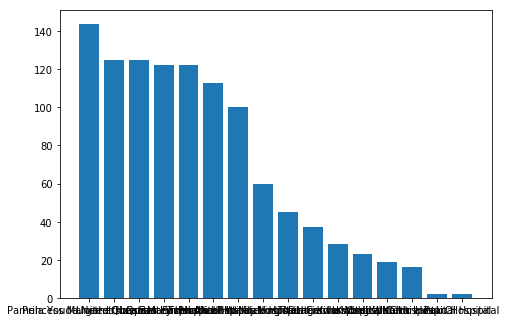

In [107]:
df_Hospital = df_cases_covid19_hk["Name of hospital admitted"].value_counts().to_frame().transpose()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
count = df_Hospital.transpose()["Name of hospital admitted"].to_list()
ax.bar(df_Hospital.keys(),count)
plt.show()



# Result

The cases in Hk is still moving up and not going to stop